# Military Expenditure Analysis

By Ricardo Lu

2019/11/15

## Goals and Research Questions

This analysis focuses on understanding how the United States, as an superpower, have the military expeniture comparing to others over time. 

1. What is the change of military expeniture in the US over 10 years? 

2. What is the change of military expeniture in China over 10 years? 

3. What is military expenitures in the top 10 countries? How can we make sense of it?

For further research question: Is China becoming a threat in terms of military expeniture per population?

## 1. Import and Install packages

In [30]:
# import Python packages
import pandas as pd #data handling library (dataframes)
import seaborn as sns #visualization library
import matplotlib #visualization library
import matplotlib.pyplot as plt #visualization library


#more visualization packages using Plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

In [32]:
#format for visualizations
%matplotlib inline
sns.set_style('whitegrid')

#change display format for float values to show us precision to two decimal places
pd.options.display.float_format = '{:,.2f}'.format

## 2. Military Expenditure Data

Data from Kaggle:https://www.kaggle.com/nitinsss/military-expenditure-of-countries-19602019

### Acknowledgements
Stockholm International Peace Research Institute(SIPRI)

The World Bank Database

### License:
World Bank Dataset Terms of Use

### Description
Annual Military Expenditure data in terms of current USD value($) for countries, self-governing semi-autonomous regions, regions clustered based on geography or economy, and the entire world from the year 1960 till 2018



### Column

Name: Name of the Region

Code: World bank code for that Region

Type: Brief description of that region

Indicator Name: Indicator Name

Year: Expenditure in current US dollar

In [33]:
#import Military Expeniture Data,I make the colomn "Code" as an index
df = pd.read_csv('Military Expenditure.csv', index_col ="Code")

In [34]:
#view the data
df

,Name,Type,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ABW,Aruba,Country,Military expenditure (current USD),nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
AFG,Afghanistan,Country,Military expenditure (current USD),nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"2,939,585.50",nan,nan,"3,341,271.55","3,581,366.35","4,203,664.57","5,393,251.22","6,127,288.06",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"125,111,557.50","122,727,193.10","131,346,231.30","219,580,214.30","240,532,594.60","251,869,514.80","298,146,852.50","325,807,003.70","238,583,385.40","217,194,107.10","268,227,074.20","199,518,614.80","185,878,310.10","191,407,113.20","198,086,263.30"
AGO,Angola,Country,Military expenditure (current USD),nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"343,271,609.10","504,712,881.90","497,359,449.20","618,891,637.10","668,493,883.30","778,628,250.60","1,066,247,744.00","1,146,467,010.00","1,156,494,418.00","1,487,398,890.00","1,469,382,980.00","1,948,559,396.00","1,751,153,152.00","1,031,247,788.00","794,138,821.20","1,774,397,877.00","594,991,178.70","233,843,714.90","159,741,933.50","456,780,475.00","170,278,292.60","1,066,588,789.00","583,621,333.60","404,299,140.00","438,686,245.40","670,021,164.40","817,533,582.20","1,365,055,399.00","1,970,309,115.00","2,032,432,883.00","3,163,591,147.00","3,311,193,245.00","3,500,794,836.00","3,639,496,374.00","4,144,634,851.00","6,090,751,702.00","6,841,864,484.00","3,608,299,115.00","2,764,054,937.00","3,062,872,914.00","1,983,613,748.00"
ALB,Albania,Country,Military expenditure (current USD),nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"31,559,657.48","39,289,843.43","49,649,504.93","50,907,521.78","45,713,356.11","29,825,492.00","33,638,047.44","42,784,205.21","45,362,503.39","53,232,045.16","58,649,352.50","76,142,881.76","100,922,358.40","110,140,852.70","140,983,900.70","194,840,309.20","255,677,957.80","182,736,862.50","185,893,242.00","197,006,789.20","183,204,695.70","180,015,508.80","178,120,368.00","132,350,667.60","130,853,162.60","144,382,688.70","180,488,725.10"
AND,Andorra,Country,Military expenditure (current USD),nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ARB,Arab World,Regions Clubbed Geographically,Military expenditure (current USD),nan,nan,"833,229,524.10","916,446,054.50","1,225,338,998.00","1,416,443,189.00","1,548,666,185.00","1,684,446,592.00","2,031,297,443.00","2,520,054,562.00","2,980,085,336.00","3,346,818,699.00","3,722,311,542.00","5,149,216,359.00","5,939,677,298.00","6,542,589,258.00","7,664,547,685.00","21,087,366,664.00","23,611,330,024.00","28,041,477,384.00","34,463,402,591.00","39,939,322,642.00","40,382,443,515.00","34,868,573,704.00","36,994,839,308.00","32,977,558,769.00","14,390,091,251.00","29,739,839,768.00","28,872,826,806.00","24,604,659,766.00","36,512,289,679.00","41,035,099,161.00","32,810,749,318.00","29,606,345,067.00","29,413,366,450.00","26,684,323,434.00","26,486,123,009.00","35,484,055,036.00","39,322,695,875.00","36,889,627,319.00","40,740,633,349.00","42,770,280,444.00","40,851,036,167.00","42,622,220,140.00","48,508,764,668.00","54,649,194,506.00","61,282,170,542.00","73,5

## 4. Create a New Dataframe

In [38]:
#create a new dataframe with data in lastest 10 years and drop all rows with nan value
df1=df[['Name','Type','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']].dropna().copy()

#create a new dataframe with only countres in lastest 10 years data
df2=df1[df1['Type']=='Country']

#view the new dataframe
df2

,Name,Type,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Code,,,,,,,,,,,,
AFG,Afghanistan,Country,"251,869,514.80","298,146,852.50","325,807,003.70","238,583,385.40","217,194,107.10","268,227,074.20","199,518,614.80","185,878,310.10","191,407,113.20","198,086,263.30"
AGO,Angola,Country,"3,311,193,245.00","3,500,794,836.00","3,639,496,374.00","4,144,634,851.00","6,090,751,702.00","6,841,864,484.00","3,608,299,115.00","2,764,054,937.00","3,062,872,914.00","1,983,613,748.00"
ALB,Albania,Country,"182,736,862.50","185,893,242.00","197,006,789.20","183,204,695.70","180,015,508.80","178,120,368.00","132,350,667.60","130,853,162.60","144,382,688.70","180,488,725.10"
ARG,Argentina,Country,"2,981,852,290.00","3,475,348,407.00","4,051,930,105.00","4,563,217,859.00","5,137,974,301.00","4,979,442,724.00","5,482,616,701.00","4,509,647,660.00","5,459,643,672.00","4,144,991,771.00"
ARM,Armenia,Country,"359,499,343.50","395,011,507.80","390,871,433.90","380,571,678.90","444,551,859.50","457,807,021.80","447,379,807.50","431,396,218.60","443,610,413.30","608,854,649.90"
AUS,Australia,Country,"18,960,138,513.00","23,217,692,816.00","26,597,198,655.00","26,216,580,848.00","24,825,262,589.00","25,783,708,714.00","24,045,569,111.00","26,382,947,050.00","27,691,112,417.00","26,711,834,225.00"
AUT,Austria,Country,"3,334,754,940.00","3,218,351,224.00","3,409,721,209.00","3,187,227,449.00","3,229,065,841.00","3,305,159,256.00","2,665,409,782.00","2,885,947,386.00","3,138,359,204.00","3,367,460,383.00"
AZE,Azerbaijan,Country,"1,472,909,977.00","1,476,608,734.00","3,080,084,996.00","3,246,122,613.00","3,367,574,161.00","3,427,179,917.00","2,943,396,693.00","1,396,969,108.00","1,528,859,592.00","1,708,941,176.00"
BEL,Belgium,Country,"5,620,670,063.00","5,244,720,513.00","5,499,370,964.00","5,168,997,834.00","5,263,164,883.00","5,191,509,381.00","4,202,062,770.00","4,314,102,067.00","4,484,652,582.00","4,959,692,173.00"


In [36]:
df3.info()
#make sure that datatype is all good for visualizations

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, AFG to ZMB
Data columns (total 12 columns):
Name    137 non-null object
Type    137 non-null object
2009    137 non-null float64
2010    137 non-null float64
2011    137 non-null float64
2012    137 non-null float64
2013    137 non-null float64
2014    137 non-null float64
2015    137 non-null float64
2016    137 non-null float64
2017    137 non-null float64
2018    137 non-null float64
dtypes: float64(10), object(2)
memory usage: 13.9+ KB


In [42]:
df3.describe().T
#Describe the military expeniture among countries each year

,count,mean,std,min,25%,50%,75%,max
2009,137.00,"11,022,157,656.80","58,527,862,365.14",0.00,"144,434,608.40","798,868,642.20","4,017,404,478.00","669,000,000,000.00"
2010,137.00,"11,617,298,148.70","61,124,437,240.60",0.00,"167,857,928.00","772,085,107.50","4,407,286,453.00","698,000,000,000.00"
2011,137.00,"12,368,935,583.84","62,672,551,457.54",0.00,"197,006,789.20","829,031,753.50","4,973,863,849.00","711,000,000,000.00"
2012,137.00,"12,373,581,942.94","60,900,425,468.88",0.00,"196,661,489.00","853,622,633.20","4,592,165,378.00","685,000,000,000.00"
2013,137.00,"12,345,794,415.54","57,777,110,077.33",0.00,"211,176,025.90","956,952,644.10","5,529,879,481.00","640,000,000,000.00"
2014,137.00,"12,390,515,881.61","55,992,392,454.72",0.00,"218,118,382.30","913,368,512.80","5,191,509,381.00","610,000,000,000.00"
2015,137.00,"11,852,633,633.05","54,991,039,385.75",0.00,"199,518,614.80","843,667,802.80","4,818,121,326.00","596,000,000,000.00"
2016,137.00,"11,779,725,786.20","55,232,852,305.75",0.00,"161,751,874.30","755,406,457.60","4,796,010,962.00","600,000,000,000.00"
2017,137.00,"12,237,200,545.36","56,155,089,436.48",0.00,"191,065,838.80","824,187,016.90","5,093,788,906.00","606,000,000,000.00"
2018,137.00,"12,895,841,865.89","60,150,383,555.32",0.00,"218,444,253.60","1,030,416,770.00","5,227,152,013.00","649,000,000,000.00"


## 6. Visualization & Analysis

### Top Ten Countries with the most military expenditure in 2018

In [43]:
# Looking for top 10 countries with the most military expenditure and create a new dataframe
Top_Ten=df3.sort_values("2018", ascending=False).head(10)
Top_Ten['2018'].index

Index(['USA', 'CHN', 'SAU', 'IND', 'FRA', 'RUS', 'GBR', 'DEU', 'JPN', 'KOR'], dtype='object', name='Code')

Top Ten Coutries with the most militory expenditure in 2018


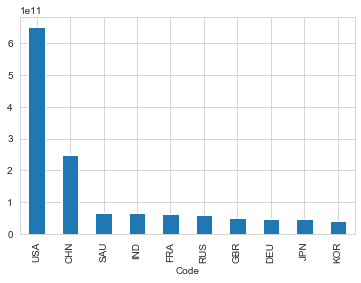

In [52]:
#make a bar plot for top 10 countries with the most military expenditure
print("Top Ten Coutries with the most militory expenditure in 2018")
Top_Ten['2018'].plot.bar()

### The militory expenditure in USA from 2009 to 2018

In [55]:
#create a dataframe that the militory expenditure in USA from 2009 to 2018
United_States=df3.loc[['USA'],['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']]
United_States=United_States.transpose()
df4=United_States['USA'].to_frame()
df4

,USA
2009,"669,000,000,000.00"
2010,"698,000,000,000.00"
2011,"711,000,000,000.00"
2012,"685,000,000,000.00"
2013,"640,000,000,000.00"
2014,"610,000,000,000.00"
2015,"596,000,000,000.00"
2016,"600,000,000,000.00"
2017,"606,000,000,000.00"
2018,"649,000,000,000.00"


The Militory Expenditure in the USA from 2009 to 2018


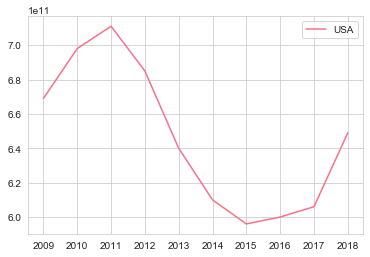

In [85]:
print('The Militory Expenditure in the USA from 2009 to 2018')
sns.lineplot(data=df4,color='blue')

### The militory expenditure in China from 2009 to 2018

In [57]:
#create a dataframe that the militory expenditure in China from 2009 to 2018
China=df3.loc[['CHN'],['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']]
China=China.transpose()
df5=China['CHN'].to_frame()
df5

,CHN
2009,"106,000,000,000.00"
2010,"116,000,000,000.00"
2011,"138,000,000,000.00"
2012,"157,000,000,000.00"
2013,"180,000,000,000.00"
2014,"201,000,000,000.00"
2015,"214,000,000,000.00"
2016,"216,000,000,000.00"
2017,"228,000,000,000.00"
2018,"250,000,000,000.00"


The Militory Expenditure in China from 2009 to 2018


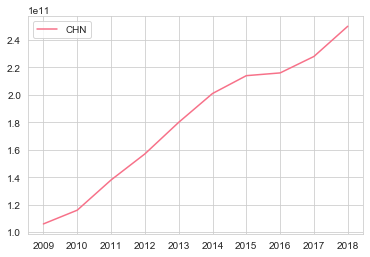

In [81]:
print('The Militory Expenditure in China from 2009 to 2018')
sns.lineplot(data=df5,color='pink')

 ### The militory expenditure in USA and China

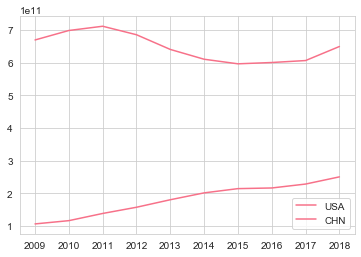

In [88]:
sns.lineplot(data=df4, color='blue')
sns.lineplot(data=df5, color='pink')

Observation :Military expeniture is growing rapidly in China, but it is still about one third of that in the US

### USA military Expenditure compared to other top ten coutries combined

In [79]:
#other 9 top ten coutries; military expeniture in 2018
Combined=Top_Ten['2018']
Combined[1:10]

Code
CHN   250,000,000,000.00
SAU    67,554,666,667.00
IND    66,510,289,108.00
FRA    63,799,676,593.00
RUS    61,387,546,980.00
GBR    49,997,192,521.00
DEU    49,470,627,811.00
JPN    46,617,954,864.00
KOR    43,069,973,343.00
Name: 2018, dtype: float64

In [80]:
#military Expenditure of other 9 top ten coutries combined
Combined[1:10].aggregate(func = sum)

698407927887.0

USA military Expenditure compared to other top ten coutries combined


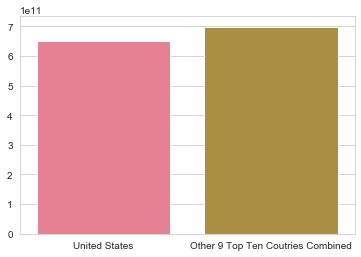

In [99]:
#create vidualization
print("USA Military Expenditure compared to other top ten coutries combined")
x = ['United States', 'Other 9 Top Ten Coutries Combined']
y = [Combined[0],Combined[1:10].aggregate(func = sum)]
sns.barplot(x,y)

Conclusion: The statement that USA military Expenditure is greater than other top ten coutries combined is not ture in 2018.

### USA Military Expenditure compared to the World 

In [101]:
World=df1.loc[['WLD'],['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']]
World=World.transpose()

Code,WLD
2009,"1,550,000,000,000.00"
2010,"1,630,000,000,000.00"
2011,"1,730,000,000,000.00"
2012,"1,740,000,000,000.00"
2013,"1,740,000,000,000.00"
2014,"1,740,000,000,000.00"
2015,"1,640,000,000,000.00"
2016,"1,630,000,000,000.00"
2017,"1,700,000,000,000.00"
2018,"1,780,000,000,000.00"


USA Military Expenditure compared to the World


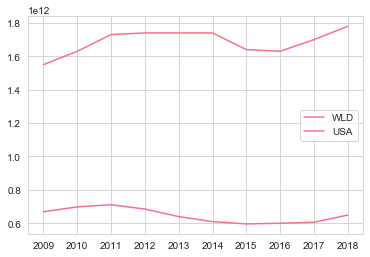

In [104]:
print("USA Military Expenditure compared to the World") 
sns.lineplot(data=World)
sns.lineplot(data=df4)

Observation: The world military expeniture seems to fluctuate along with United States

### Ethics:
This project use authoried and puclic sources and is expected to do no harm to the society.

You are welcome to email Ricardo Lu: ylu1@iwu.edu for more information or concerns.